In [96]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly_express as px
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

In [65]:
# Leer el archivo CSV comprimido directamente como DataFrame
gz_calendar= pd.read_csv('res/calendar.csv.gz', compression='gzip')

gz_listings=pd.read_csv('res/listings.csv.gz',compression='gzip')

gz_reviews=pd.read_csv('res/reviews.csv.gz',compression='gzip')

df_listings=pd.read_csv('res/listings.csv')

df_reviews=pd.read_csv('res/reviews.csv')


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13152\2410161840.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  gz_calendar= pd.read_csv('res/calendar.csv.gz', compression='gzip')


In [26]:
print(gz_calendar.shape)
gz_calendar.head(5)


(3686136, 7)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3078404,2024-06-29,f,"$1,500.00",NaN,7.0,20.0
1,3078404,2024-06-30,f,"$1,500.00",NaN,7.0,20.0
2,3078404,2024-07-01,f,"$1,500.00",NaN,7.0,20.0
3,3078404,2024-07-02,f,"$1,500.00",NaN,7.0,20.0
4,3078404,2024-07-03,f,"$1,500.00",NaN,7.0,20.0


In [66]:
gz_calendar.isnull().sum()

listing_id              0
date                    0
available               0
price                   0
adjusted_price    3684311
minimum_nights          2
maximum_nights          2
dtype: int64

In [67]:
del gz_calendar['adjusted_price']

In [68]:
print(gz_listings.shape)
gz_listings.sample(5)

(10099, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1664,43442487,https://www.airbnb.com/rooms/43442487,20240629155744,2024-06-29,city scrape,Fantastic campervan close to Oslo,"Small cozy camper van made for Arctic climate,...",NaN,https://a0.muscache.com/pictures/25cf8892-a023...,38014506,...,4.83,4.33,4.83,NaN,f,5,5,0,0,0.13
542,14097855,https://www.airbnb.com/rooms/14097855,20240629155744,2024-06-29,city scrape,Summer in Oslo with panoramic view,This Oslo appartment has an amazing view so yo...,"The neighbourhood is so calm and peaceful, nic...",https://a0.muscache.com/pictures/e8905e30-4cb2...,84848767,...,4.90,4.85,4.75,NaN,f,2,2,0,0,0.23
7804,1088961446391631296,https://www.airbnb.com/rooms/1088961446391631296,20240629155744,2024-06-29,city scrape,Carl Berners plass,Welcome to our factory apartment central in Os...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,561471159,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
7072,1020999928694768299,https://www.airbnb.com/rooms/1020999928694768299,20240629155744,2024-06-30,previous scrape,Sleep behind the Royal Palace.,"Simple and peaceful accommodation, which is ce...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,272635662,...,5.00,5.00,4.89,NaN,f,3,3,0,0,1.22
3420,695272411756855073,https://www.airbnb.com/rooms/695272411756855073,20240629155744,2024-06-29,city scrape,Fantastisk fin toppleilighet med privat takter...,Get a unique experience in a central apartment...,"The apartment is very centrally located, with ...",https://a0.muscache.com/pictures/miso/Hosting-...,296480528,...,5.00,5.00,4.71,NaN,f,1,1,0,0,0.76


In [69]:
gz_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [70]:
columnas_a_eliminar = [t for t in gz_listings.columns if (gz_listings[t].isnull().sum() / gz_listings.shape[0] * 100) > 20]
gz_listings.drop(columns=columnas_a_eliminar, axis=1, inplace=True)

In [71]:
url=[i for i in gz_listings.columns if i[-3:]=='url']
gz_listings.drop(columns=url,axis=1,inplace=True)

In [72]:

eliminar=['host_name','description','host_has_profile_pic','host_identity_verified','host_location','property_type','bathrooms','bathrooms_text','beds','has_availability','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_last_scraped','has_availability']

gz_listings.drop(columns=eliminar,axis=1,inplace=True)

In [73]:
gz_listings.shape

(10099, 34)

In [74]:
gz_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10099 entries, 0 to 10098
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10099 non-null  int64  
 1   scrape_id                                     10099 non-null  int64  
 2   last_scraped                                  10099 non-null  object 
 3   source                                        10099 non-null  object 
 4   name                                          10099 non-null  object 
 5   host_id                                       10099 non-null  int64  
 6   host_since                                    10099 non-null  object 
 7   host_acceptance_rate                          8790 non-null   object 
 8   host_is_superhost                             9995 non-null   object 
 9   host_listings_count                           10099 non-null 

In [75]:
gz_listings.rename(columns={'neighbourhood_cleansed':'neighbourhood'},inplace=True)

In [76]:
gz_listings.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,10099.0,NaN,NaN,NaN,727761819449215104.0,427984314100355328.0,42932.0,594041758423271168.0,900596761031286400.0,1071328676339277184.0,1189091774066713600.0
scrape_id,10099.0,NaN,NaN,NaN,20240629155744.0,0.0,20240629155744.0,20240629155744.0,20240629155744.0,20240629155744.0,20240629155744.0
last_scraped,10099,2,2024-06-29,6992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,10099,2,city scrape,8890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,10099,9433,Leilighet på Grünerløkka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,10099.0,NaN,NaN,NaN,175581736.859194,179729144.090502,43067.0,33739409.0,93032042.0,274316669.5,586067173.0
host_since,10099,3491,2019-01-02,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,8790,101,100%,2315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,9995,2,f,8269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,10099.0,NaN,NaN,NaN,2.864046,10.04627,1.0,1.0,1.0,2.0,131.0


In [77]:
nulos_por_columna = gz_listings.isnull().sum()

# Filtrar las columnas con más de un valor nulo
columnas_con_mas_de_un_nulo = nulos_por_columna[nulos_por_columna > 1]

print("Columnas con más de un valor nulo:")
print((columnas_con_mas_de_un_nulo.sort_values(ascending=False)/gz_listings.shape[0]*100).round(2))

Columnas con más de un valor nulo:
host_acceptance_rate    12.96
price                   12.37
bedrooms                 1.71
host_is_superhost        1.03
dtype: float64


<Axes: >

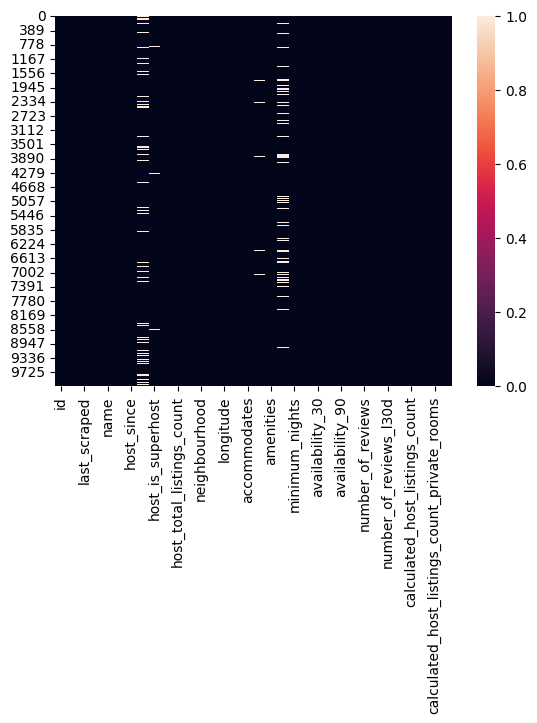

In [78]:
sns.heatmap(gz_listings.isnull())

In [79]:
columnas_con_mas_de_un_nulo

host_acceptance_rate    1309
host_is_superhost        104
bedrooms                 173
price                   1249
dtype: int64

In [111]:
gz_listings['price'] = gz_listings['price'].str.replace('[\$,]', '', regex=True).astype(float)
gz_listings['host_acceptance_rate'] = gz_listings['host_acceptance_rate'].str.replace('%', '').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13152\2436671580.py:1: SyntaxWarning: invalid escape sequence '\$'
  gz_listings['price'] = gz_listings['price'].str.replace('[\$,]', '', regex=True).astype(float)


In [115]:
gz_listings['bedrooms'].dtype

dtype('float64')

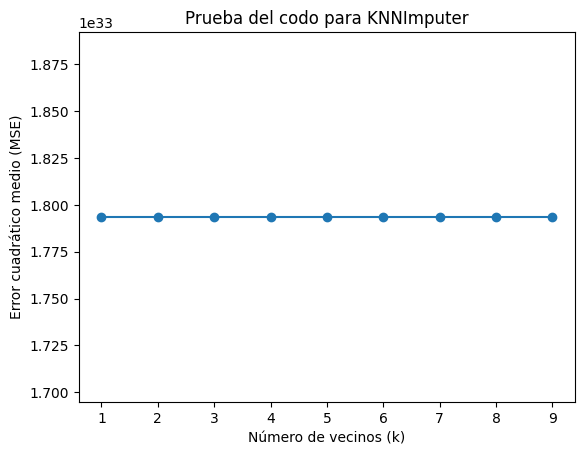

In [117]:
df_clean = gz_listings.select_dtypes('float','int').dropna()

# Lista para almacenar errores
errors = []

# Rango de k a probar
k_range = range(1, 10)

# Bucle para probar diferentes valores de k
for k in k_range:
    imputer = KNNImputer(n_neighbors=k)
    df_imputed = imputer.fit_transform(gz_listings.select_dtypes('float','int'))
    
    # Calcular el error (usamos MSE en este ejemplo)
    mse = mean_squared_error(df_clean.dropna(), df_imputed[:len(df_clean)])
    errors.append(mse)

# Graficar la prueba del codo
plt.plot(k_range, errors, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Prueba del codo para KNNImputer')
plt.show()

In [97]:
columnas_numericas = gz_listings.select_dtypes('int','float')

# Inicializar el KNNImputer con k = 6 (puedes cambiar el valor según lo analizado)
imputer = KNNImputer(n_neighbors=6)

# Imputar valores nulos en las columnas numéricas
df_numerico_imputado = imputer.fit_transform(columnas_numericas)

# Crear un nuevo DataFrame con los valores imputados y mismas columnas
df_imputado = pd.DataFrame(df_numerico_imputado, columns=columnas_numericas.columns)

# Reemplazar las columnas numéricas originales en el DataFrame original con las imputadas
gz_listings[columnas_numericas.columns] = df_imputado


In [105]:
gz_listings['price']

0        $3,400.00
1          $572.00
2        $1,929.00
3          $736.00
4        $1,029.00
           ...    
10094      $904.00
10095    $3,120.00
10096      $639.00
10097      $734.00
10098      $960.00
Name: price, Length: 10099, dtype: object